In [7]:
# An analysis on calories burnt by activity type - 
import pandas as pd
import matplotlib.pyplot as plt

# What week is it?
week = "Week 45"

# Try to import the CSV file, handling potential errors
try:
    # Import in CSV file and skip the first row
    activity_calories = pd.read_csv('Week45/Activity Calories.csv', skiprows=[0])

    # New column names
    new_column_names = ['Day', 'Activity Type', 'Value']
    
    # Ensure the number of new column names matches the number of columns in the DataFrame
    if len(new_column_names) == len(activity_calories.columns):
        activity_calories.columns = new_column_names
    else:
        print("Error: The number of new column names does not match the number of columns in the DataFrame")

    # Replace 'Fitness Equipment' with 'Gym Cardio' in the 'Activity Type' column
    activity_calories['Activity Type'] = activity_calories['Activity Type'].replace('Fitness Equipment', 'Gym Cardio')
    
    # Print the DataFrame to inspect
    print(activity_calories)#.head())
    
except FileNotFoundError:
    print("The specified file was not found.")




    Day Activity Type  Value
0   Mon       Walking    171
1   Mon    Gym Cardio    832
2   Tue       Walking   1090
3   Tue    Gym Cardio    364
4   Wed       Walking    425
5   Wed    Gym Cardio    247
6   Thu       Walking    433
7   Thu    Gym Cardio    579
8   Fri       Walking    350
9   Sat       Walking    628
10  Sat    Gym Cardio    743
11  Sun       Walking   2202


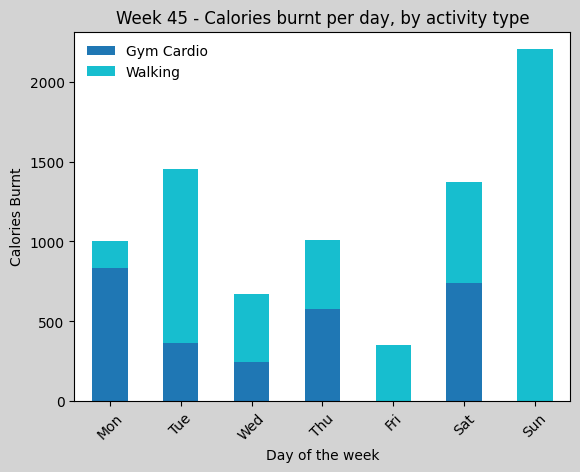

In [8]:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html
df = activity_calories

# Group the dataframe by the 'Day' and 'Activity Type' columns, then sum the values and unstack.
grouped = df.groupby(['Day','Activity Type']).sum()['Value'].unstack()
#print(grouped)

# Reorder bars
order = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun']

# Stacked bar chart - https://matplotlib.org/stable/users/explain/colors/colormaps.html
ax = grouped.loc[order].plot(kind='bar', stacked=True, colormap='tab10')

# Set the background color of the entire figure
fig = plt.gcf()
fig.set_facecolor('lightgrey')
# Set the color of the graph itself
ax.set_facecolor('white')

ax.legend(loc='upper left', frameon=False)# ncol=2)

# Label axis'
plt.xlabel('Day of the week', color='black')
plt.ylabel('Calories Burnt', color='black')
plt.title(week + ' - Calories burnt per day, by activity type', color='black')

# Customize x, y ticks
plt.xticks(rotation=45, color='black')
plt.yticks(color='black')

# Show me the dam thing
plt.show()